# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [53]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [54]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [55]:
#  1. Get the total rides for each city type
Total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [56]:
# 2. Get the total drivers for each city type
Total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
Total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [57]:
#  3. Get the total amount of fares for each city type
Total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [58]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = Total_fares / Total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [59]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = Total_fares / Total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [60]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total rides": Total_rides,
    "Total drivers": Total_drivers,
    "Total fares": Total_fares,
    "Average fare per ride": average_fare_per_ride,
    "Average fare per driver": average_fare_per_driver})
pyber_summary_df

,Total rides,Total drivers,Total fares,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [61]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [62]:
#  8. Format the columns.
pyber_summary_df["Total rides"] = pyber_summary_df["Total rides"].map("{:,}".format)
pyber_summary_df["Total drivers"] = pyber_summary_df["Total drivers"].map("{:,}".format)
pyber_summary_df["Total fares"] = pyber_summary_df["Total fares"].map("${:,.2f}".format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map("${:,.2f}".format)
pyber_summary_df["Average fare per driver"] = pyber_summary_df["Average fare per driver"].map("${:,.2f}".format)

pyber_summary_df

,Total rides,Total drivers,Total fares,Average fare per ride,Average fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [63]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [64]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
fares_df.head(10)

,,fare
date,type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31
1/1/2019 14:52,Suburban,31.15
1/1/2019 17:22,Urban,42.11
1/1/2019 21:04,Urban,11.71
1/1/2019 2:07,Suburban,24.07


In [65]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_df = fares_df.reset_index()

In [66]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fares_citytype_pivot = fares_df.pivot(index="date", columns="type", values="fare")
fares_citytype_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [67]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_citytype_date_pivot = fares_city_pivot.loc['1/1/2019':'4/28/2019']
fares_citytype_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [68]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_citytype_date_pivot.index = pd.to_datetime(fares_citytype_date_pivot.index)

In [69]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_citytype_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2038 entries, 2019-01-01 00:08:00 to 2019-04-27 08:48:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  532 non-null    float64
 2   Urban     1403 non-null   float64
dtypes: float64(3)
memory usage: 63.7 KB


In [72]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_citytype_date_pivot.resample('W').sum()
weekly_fares_df.head(20)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


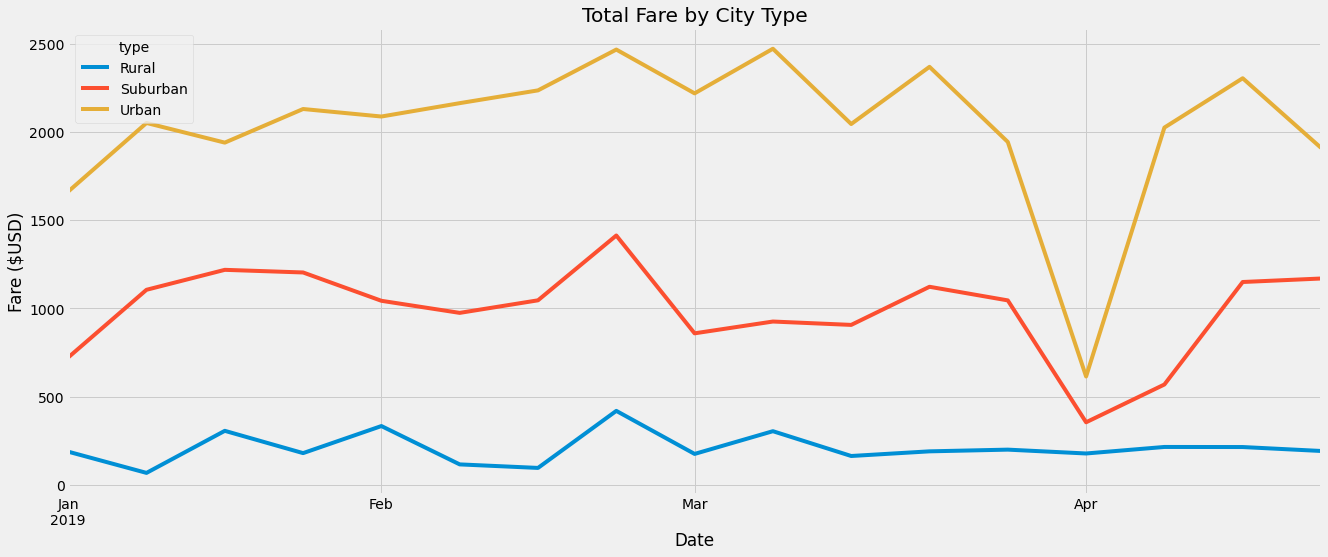

In [71]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = weekly_fares_df.plot(figsize=(20,8))
ax.set_title("Total Fare by City Type")
ax.set_xlabel('Date')
ax.set_ylabel('Fare ($USD)')

plt.savefig("analysis\PyBer_fare_summary.png")